**PROBABILITY FOR DATA SCIENCE: Project 3, Random Assignment Problem**

*ABSTRACT:* The random assignment problem consists of allocating *n* jobs to an equal number of machines to minimize a random total cost. We aim to estimate the expected cost value associated with the optimal solution.

*OBJECTIVES:* Minimize the total cost *An* for a given *n x n* cost matrix *C* with independent and identically distributed random variables with distribution *U(0,1)* and also estimate the expected cost value *E(An)* as *n* grows large.

**Import the necessary libreries** 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

**Step 1:** Generate the cost matrix

Generate a *n x n* matrix where each element *c(i,j)* is a random number with uniform distribution *U(0,1)*

In [3]:
def cost_matrix(n):
    return np.random.uniform(0, 1, (n,n))

**Step 2:** Create the total cost function

Create a function to calculate the total cost for a given permutation of the cost matrix.

In [5]:
def total_cost(matrix, permutation):
    return sum(matrix[i, permutation[i]] for i in range(len(permutation)))

**Step 3:** Define the Metropolis-Hastings algorithm with history.

Implement the Metropolis-Hastings algorithm by including permutation and cost tracking

In [6]:
def metropolis_hastings_with_history(matrix, beta, initalial_permutation, steps):
    n = len(initalial_permutation) #length of the permutation --> numer of elements to permute
    permutations = [initalial_permutation.copy()] #inizialize the list of permutations with the initial permutation
    costs = [total_cost(matrix, initalial_permutation)] #inizialize the list of costs with the cost of the initial permutation
    
    for t in range(1, steps):
        next_permutation = np.random.permutation(n) #generate a new random permutation
        new_cost = total_cost(matrix, next_permutation) #calculate the cost of the new permutation
        acceptable_prob = min(1, np.exp(-beta * (costs[t-1] - new_cost))) #calculate the acceptable probability 
        
        if np.random.uniform(0,1) < acceptable_prob: #if the permutation is acceptable
            permutations.append(next_permutation) #consider the new permutation 
            costs.append(new_cost) #and the new cost in the list
            
    return permutations, costs

**Step 4:** Define the Metropolis-Hastings algorithm without history.

Implement the Metropolis-Hastings algorithm by including only the final permutation and cost

In [7]:
def metropolis_hastings_without_history(matrix, beta, initial_permutation, steps):
    n = len(initial_permutation)
    permutation = initial_permutation.copy()
    cost = total_cost(matrix, initial_permutation) #calculate initial total cost
    
    for t in range(1, steps):
        next_permutation = np.random.permutation(n) #generate a random neighboring permutation
        new_cost = total_cost(matrix, next_permutation) #calculate the total cost of the new permutation
        acceptance_probability = np.exp(beta * (cost - new_cost)) #calculate acceptance probability
       
        if np.random.uniform(0, 1) < min(1, acceptance_probability): #accept or reject the new permutation based on acceptance probability
            permutation = next_permutation
            cost = new_cost
    
    return permutation, cost

**Step 5:** Estimating the value of E(An) and displaying the results

In [10]:
#Parameters:
beta = 10 #parameter for the Metropolis-Hastings algorithm
steps = 1000 #number of steps for each simulation
M = 100 #number of independent realizations for each simulation
dimensions = [5 * alpha for alpha in range(1,11)] #different size for the cost matrix

estimated_costs = [] #list to store estimated costs for each matrix size
for n in dimensions:
    costs = []
    for _ in range(M):
        matrix = cost_matrix(n) #generate a cost matrix of size n
        initial_permutation = np.random.permutation(n) #generate a random initial permutation of indices from 0 to n - 1
        _, cost = metropolis_hastings_without_history(matrix, beta, initial_permutation, steps) #run the Metropolis - Hastings algorithm
        costs.append(cost) #store the cost 
    E_An = np.mean(costs) #calculate the average cost
    estimated_costs.append(E_An)

In [13]:
print(f"Dimension: {n}")
print(f"E(A_n): {E_An}")

Dimension: 50
E(A_n): 18.466283975905057


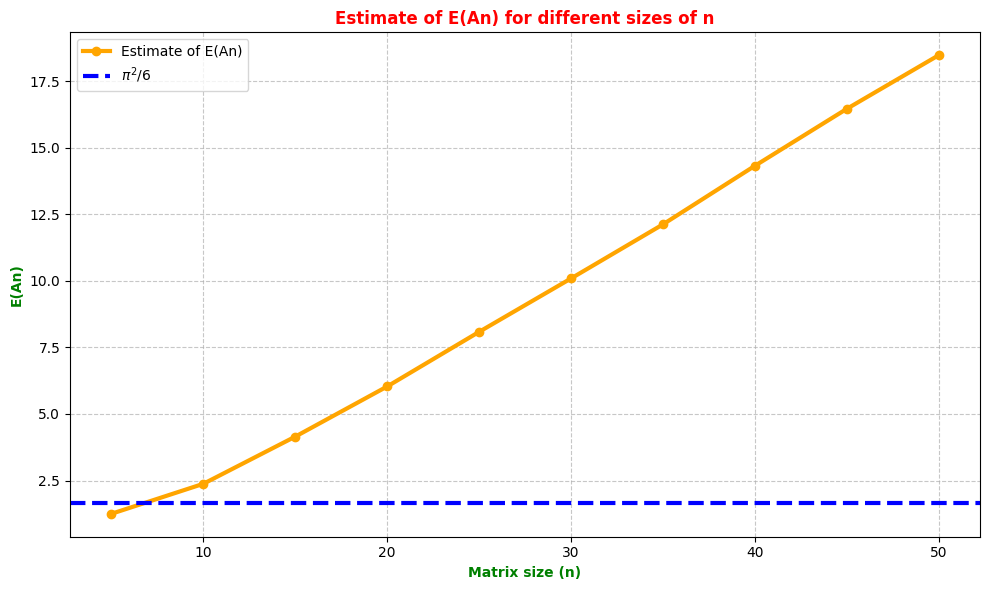

In [23]:
#plot the results
plt.figure(figsize=(10,6))
plt.plot(dimensions, estimated_costs, color = 'orange', linestyle = '-', linewidth = 3, marker = 'o', markersize = 6, label = 'Estimate of E(An)')
plt.axhline(y = np.pi**2 / 6, color = 'blue', linestyle = '--', linewidth = 3, label = r'$\pi^2 / 6$')
plt.title('Estimate of E(An) for different sizes of n', fontweight = 'bold', color = 'red')
plt.xlabel('Matrix size (n)', fontweight = 'bold', color = 'green')
plt.ylabel('E(An)', fontweight = 'bold', color = 'green')
plt.grid(True, linestyle = '--', alpha = 0.7)
plt.legend()
plt.tight_layout()
plt.show()